In [1]:
import molsysmt as msm
msm.config.set_default_standard_units(standards=['nm', 'ps', 'K', 'mole', 'amu', 'e',
                                      'kcal/mol', 'kcal/(mol*nm**2)', 'N', 'degrees'])

import numpy as np

In [2]:
from matplotlib import pyplot as plt
from nglview.color import _ColorScheme
from matplotlib.colors import Normalize, to_hex
from matplotlib import cm

In [3]:
molecular_system = msm.convert('1TCD', selection='molecule_type=="protein"')

In [4]:
msm.info(molecular_system, element='molecule')

index,name,type,n atoms,n groups,n components,chain index,entity index,entity name
0,Triosephosphate isomerase,protein,1906,248,1,0,0,Triosephosphate isomerase
1,Triosephosphate isomerase,protein,1912,249,1,1,0,Triosephosphate isomerase


In [5]:
molecular_system = msm.build.add_missing_hydrogens(molecular_system, pH=7.4, engine='PDBFixer')

In [6]:
msm.molecular_mechanics.potential_energy_minimization(molecular_system)

In [7]:
msm.molecular_mechanics.get_potential_energy(molecular_system, decomposition=True)

{'HarmonicBondForce': 242.0638250347305 <Unit('kilocalorie / mole')>,
 'PeriodicTorsionForce': 5702.347297741396 <Unit('kilocalorie / mole')>,
 'NonbondedForce': -21069.653366993305 <Unit('kilocalorie / mole')>,
 'CMMotionRemover': 0.0 <Unit('kilocalorie / mole')>,
 'HarmonicAngleForce': 1036.084264459847 <Unit('kilocalorie / mole')>}

In [8]:
U12 = msm.molecular_mechanics.get_non_bonded_potential_energy(molecular_system,
                                                              selection='molecule_index==0',
                                                              selection_2='molecule_index==1')

In [9]:
U12

-450.18971080305926 <Unit('kilocalorie / mole')>

In [10]:
%%time
U12_groups = msm.molecular_mechanics.get_non_bonded_potential_energy(molecular_system,
                                                              selection='all in groups of molecule_index==0',
                                                              selection_2='all in groups of molecule_index==1')

CPU times: user 5min 10s, sys: 554 ms, total: 5min 11s
Wall time: 5min 11s


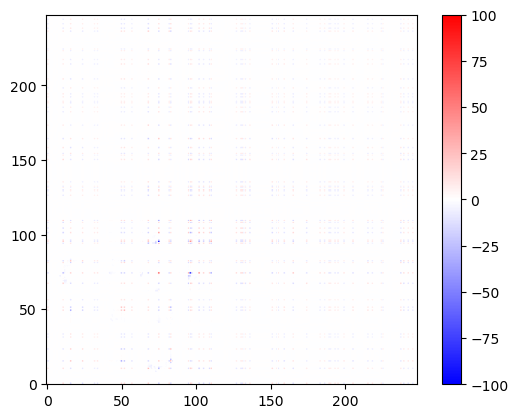

In [16]:
plt.imshow(U12_groups, origin='lower', cmap='bwr', vmin=-100, vmax=100)
plt.colorbar()
plt.show()

In [31]:
mask = np.absolute(msm.pyunitwizard.get_value(U12_groups))>10.0
np.sum(mask)

511

In [32]:
mask2 = msm.pyunitwizard.get_value(U12_groups)<-10.0
np.sum(mask2)

263

In [33]:
np.sum(U12_groups[mask])/U12

0.6642484964744921 <Unit('dimensionless')>

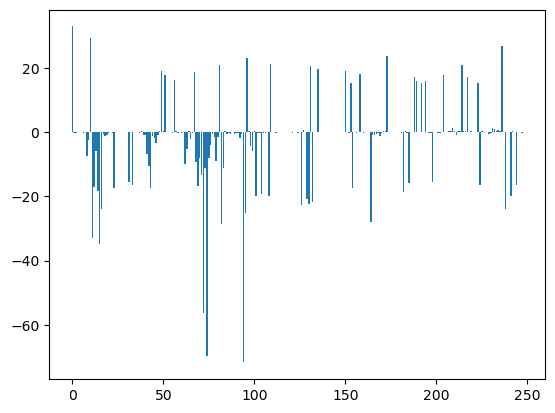

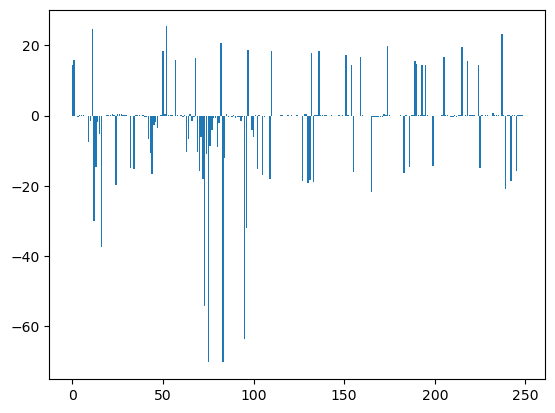

In [34]:
U12_1_groups= U12_groups.sum(axis=1)
U12_2_groups= U12_groups.sum(axis=0)

plt.bar(np.arange(U12_1_groups.shape[0]), msm.pyunitwizard.get_value(U12_1_groups))
plt.show()

plt.bar(np.arange(U12_2_groups.shape[0]), msm.pyunitwizard.get_value(U12_2_groups))
plt.show()

In [36]:
distance = msm.structure.get_distances(molecular_system, selection='all in groups of molecule_index==0',
                 selection_2='all in groups of molecule_index==1')

/home/diego/Myopt/miniconda3/envs/MolSysMT@uibcdf_3.10/lib/python3.10/site-packages/numpy/ma/core.py:2820: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


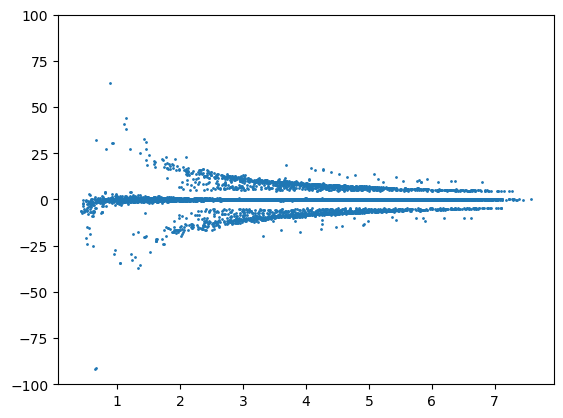

In [37]:
plt.scatter(distance.flatten(), U12_groups.flatten(), s=1.0)
plt.ylim([-100.0, 100.0])
plt.show()

In [43]:
msm.pyunitwizard.get_value(U12_groups)<-75

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [44]:
groups_1 = msm.get(molecular_system, element='group', selection='molecule_index==0', group_index=True)
groups_2 = msm.get(molecular_system, element='group', selection='molecule_index==1', group_index=True)

In [45]:
np.where(msm.pyunitwizard.get_value(U12_groups)<-75)

(array([74, 95]), array([96, 75]))

In [49]:
groups_1[74], groups_1[96], groups_2[75], groups_2[95], 

(74, 96, 323, 343)

In [50]:
msm.info(molecular_system, element='group', selection='group_index==[74, 96, 323, 343]')

index,id,name,type,n atoms,component index,chain index,molecule index,molecule type,entity index,entity name
74,78,GLU,amino acid,15,0,0,0,protein,0,Triosephosphate isomerase
96,100,ARG,amino acid,24,0,0,0,protein,0,Triosephosphate isomerase
323,78,GLU,amino acid,15,1,1,1,protein,0,Triosephosphate isomerase
343,98,GLU,amino acid,15,1,1,1,protein,0,Triosephosphate isomerase


In [38]:
aux = [ii for ii in msm.pyunitwizard.get_value(U12_1_groups)]
aux += [ii for ii in msm.pyunitwizard.get_value(U12_2_groups)]
aux = np.array(aux)
max_abs_val = max(abs(aux.min()), abs(aux.max()))

In [39]:
cmap = plt.colormaps['bwr']
vmin = -max_abs_val
vmax = max_abs_val

norm = Normalize(vmin=vmin,vmax=vmax)
scheme = _ColorScheme([[to_hex(cmap(norm(ii))), str(jj)] for ii,jj in zip(aux, range(len(aux)))], label='user')

In [40]:
view = msm.view(molecular_system)
view.clear()
view.add_cartoon(selection='all', color=scheme)
view

NGLWidget()